In [19]:
import sys
import os
sys.path.append("./../")


from vicon_imu_data_process.process_rawdata import *
from vicon_imu_data_process.data_augment import *
import time
import numpy as np

def get_rotmatirx(rot_angles):
    '''
    get rotation matrix of the IMU
    
    '''
    rot_matrix= []
    assert(isinstance(rot_angles,dict))
    assert(list(rot_angles.keys())==['x_angles','y_angles','z_angles'])
    for x in rot_angles['x_angles']:
        for y in rot_angles['y_angles']:
            for z in rot_angles['z_angles']:
                rot_matrix.append(np.dot(np.dot(rotmat.R('x',x),rotmat.R('y',y)),rotmat.R('z',z)))
                
    return rot_matrix


if True:
    ubjects_trials = set_subjects_trials(selected=True, landing_manner='double_legs')
    subjects_trials_dataset = load_subjects_dataset(subjects_trials)
    rot_angles = {'x_angles':np.linspace(-5,5,5),'y_angles':np.linspace(-5,5,5),'z_angles':np.linspace(-10,10,9)}
    print(rot_angles['z_angles'])
    rot_matrix = get_rotmatirx(rot_angles)
    #print(rot_matrix)
    augment_subjects_trials_dataset = imu_data_augment(subjects_trials_dataset,rot_matrix)
    save_subjects_dataset_to_a_h5(augment_subjects_trials_dataset,'4_augment_features_labels_rawdatasets.hdf5')


['P_19_xiongyihui', 'P_20_xuanweicheng', 'P_21_wujianing', 'P_15_liuzhaoyu', 'P_16_zhangjinduo', 'P_17_congyuanqi', 'P_18_hezhonghai', 'P_22_zhangning', 'P_23_wangjinhong', 'P_08_zhangboyuan', 'P_14_hunan', 'P_24_liziqing', 'P_10_dongxuan', 'P_11_liuchunyu', 'P_13_xulibang']
[-10.   -7.5  -5.   -2.5   0.    2.5   5.    7.5  10. ]


UnboundLocalError: local variable 'rot_mats' referenced before assignment

In [11]:
list(rot_angles.keys())==['x_angles','y_angles','z_angless']

False

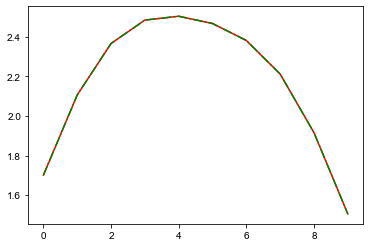

In [327]:
mod_acc = np.linalg.norm(acc[:10], axis=1, keepdims=True)
mod_aug_acc = np.linalg.norm(aug_acc[:10], axis=1, keepdims=True)
plt.plot(mod_acc,'r')
plt.plot(mod_aug_acc,'g-.')

In [308]:
augment_subjects_trials_dataset[subject_id_name][trial]

,CHEST_Accel_X,CHEST_Accel_Y,CHEST_Accel_Z,CHEST_Gyro_X,CHEST_Gyro_Y,CHEST_Gyro_Z,CHEST_Mag_X,CHEST_Mag_Y,CHEST_Mag_Z
0,-0.529284,1.591748,-0.280225,0.177825,0.249810,0.007012,-0.646333,-0.763389,-0.064076
1,-0.485439,2.041983,-0.174513,0.079012,0.272969,-0.005764,-0.645163,-0.763223,-0.063616
2,-0.428482,2.325879,-0.079297,-0.038347,0.300555,-0.018686,-0.644144,-0.763040,-0.065015
3,-0.354049,2.459265,0.004366,-0.173117,0.323917,-0.030275,-0.643428,-0.762878,-0.068528
4,-0.253079,2.490226,0.074007,-0.318949,0.334890,-0.039687,-0.642996,-0.762752,-0.073846
...,...,...,...,...,...,...,...,...,...
75,0.376893,9.846751,0.805812,-0.226227,0.017771,0.027232,-0.626086,-0.761674,-0.190566
76,0.273170,9.600551,0.754769,-0.247374,0.008044,0.029971,-0.626648,-0.760780,-0.192430
77,0.167928,9.401219,0.701484,-0.251652,0.000976,0.030314,-0.626872,-0.760157,-0.194495
78,0.072419,9.255319,0.650203,-0.238941,-0.003366,0.028961,-0.626892,-0.760025,-0.196309


0
[[ 0.9961947  -0.08715574  0.        ]
 [ 0.08715574  0.9961947   0.        ]
 [ 0.          0.          1.        ]]


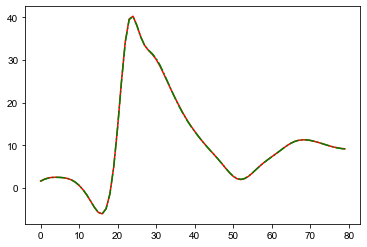

In [275]:
# 旋转矩阵生成
rot_angle = 0
print(rot_angle)
rot_mat = rotmat.R(2,5)
print(rot_mat)

cal_acc = np.dot(rot_mat, my_sensor.acc.T).T
cal_omega = np.dot(rot_mat, my_sensor.omega.T).T
cal_mag = np.dot(rot_mat, my_sensor.mag.T).T

transfer_data = {'rate':100,
               'acc': cal_acc,
               'omega':cal_omega,
               'mag':cal_mag}

my_sensor2 = MyOwnSensor(in_file='My own 2 sensor.', in_data=transfer_data)


plt.plot(my_sensor.acc[:,1],'r')
plt.plot(my_sensor2.acc[:,1],'g-.')
#my_sensor2.set_qtype('madgwick')

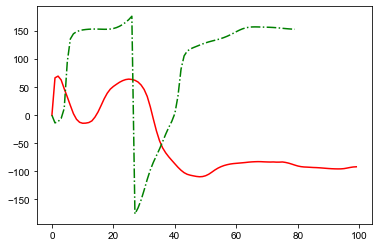

In [277]:

cal_seq = quat.quat2seq(my_sensor2.quat, seq='Euler')
plt.plot(seq[:,2],'r')
plt.plot(cal_seq[:,2],'g-.')

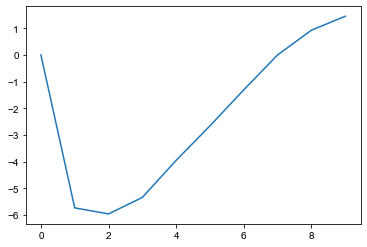

In [108]:
plt.plot(cal_seq.T[:,1])